In [1]:
import pandas as pd
import numpy as np
import re

In [2]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

In [3]:
df = pd.read_csv('gurgaon_properties_cleaned_v1.csv')

In [4]:
df.sample(5)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features
1694,flat,pyramid urban,sector 67a,0.56,7928.0,706.0,Carpet area: 700 (65.03 sq.m.),2,2,2,others,0.0,North-East,1 to 5 Year Old,"['Airia Mall, Sector 68', 'M3M Cosmopolitan Mall', 'Delhi Public School 67A', 'KIIT College of Engineering', 'Ashoka International School', 'DPS Maruti Kunj Senior Wing', 'The Shriram Millennium Sec 64', 'Pragyanam – School', 'WorldMark Gurgaon', 'De Adventure Park', 'HP PETROL PUMP Sohna Rd']",NaN,"['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']"
601,house,independent,sector 50,7.00,23333.0,3000.0,Plot area 2400(222.97 sq.m.)Built Up area: 3400 sq.ft. (315.87 sq.m.)Carpet area: 3000 sq.ft. (278.71 sq.m.),4,4,2,servant room,3.0,North-East,10+ Year Old,"['Radhakrishna Shani Mandir', 'Standard chartered ATM', 'Icici bank ATM', 'Vatsalya Clinic', 'Meher Clinic', 'Bones Clinic - Orthopaedics', 'Vishesh Dental', 'Dr. Naresh Pandita', 'Park Hospital Gurgaon', 'Neelkanth Health Care', 'Dr. Anuj Sharma', 'Skin Clinic', 'Divine Look Clinic Centre', 'Dr. Aruna Kalra', 'Wellness Eye Centre', 'Best Urologist Atcomplete Family Clinic', 'Sukhmani Hospital Pvt. Ltd', 'Wembley estate club', 'Gardian Pharmacy', 'Genius', 'Apollo Pharmacy', 'SPAZE BUSINESS PARK', 'Unitech', 'Hdfc bank', 'Hdfc bank', 'Hdfc bank', 'Icici bank', 'Indusind bank', 'Hdfc bank and atm', 'SRS Cinemas', 'Madison and Pike', 'India', 'Haldiram', ""Domino's Pizza"", ""Nirula's"", 'Starbucks', 'Nook', 'Pizza Hut', 'Kamla International', 'Gurugram University', 'Amity Global School', 'Delhi Public School Primary Section', 'Manav Rachna School', 'Manav Rachna Swimming Pool']","['5 Wardrobe', '1 Dining Table', '5 Light', '5 AC', '1 Modular Kitchen', 'No Bed', 'No Chimney', 'No Curtains', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Water purifier', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Natural Light', 'Airy Rooms', 'Low Density Society', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center']"
1518,flat,bptp terra,sector 37d,1.55,7074.0,2191.0,Super Built up area 2191(203.55 sq.m.)Built Up area: 2100 sq.ft. (195.1 sq.m.)Carpet area: 1800 sq.ft. (167.23 sq.m.),4,3,3+,others,19.0,North-East,1 to 5 Year Old,"['Airia Mall', 'Dwarka Expressway', 'Golf Course Extension Road', 'Euro International School', 'DPG Institute of Technology', 'Medanta -The Medicity', 'Amma Hospital', 'Indira Gandhi International Airport', 'DLF Corporate Greens', 'Holiday Inn Sector 90', 'SkyJumper Trampoline Park']","['2 Wardrobe', '5 Fan', '1 Exhaust Fan', '3 Geyser', '21 Light', '6 AC', '1 Chimney', '1 Modular Kitchen', 'No Bed', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Water purifier', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'No open drainage around', 'Bank Attached Property', 'Visitor Parking', 'Swimming Pool', 'Park', 'Natural Light', 'Internet/wi-fi connectivity', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']"
1270,flat,dlf the crest,sector 54,11.00,35222.0,3123.0,Super Built up area 3123(290.14 sq.m.),4,6,3,servant room,7.0,NaN,1 to 5 Year Old,"['Sec

# 1.areaWithType

### Consists Super built-up area, buil-up area, Carpet area, Plot area . Also they must be in sq ft

In [5]:
df.sample(5)[['price','area','areaWithType']]

,price,area,areaWithType
2242,3.20,2783.0,Super Built up area 2781(258.36 sq.m.)
832,3.21,2000.0,Super Built up area 2185(202.99 sq.m.)Built Up area: 2140 sq.ft. (198.81 sq.m.)Carpet area: 2000 sq.ft. (185.81 sq.m.)
203,1.35,1545.0,Super Built up area 1545(143.54 sq.m.)
2280,6.00,4889.0,Super Built up area 4400(408.77 sq.m.)
1843,4.50,1350.0,Plot area 150(125.42 sq.m.)


In [6]:
# This function will extract Super Built Up area

def get_super_built_up_area(text):
    match = re.search(r'Super Built up area (\d+(?:\.\d+)?)',text)

    if match :
        return float(match.group(1))
    return None

In [7]:
#This function will extract the built up area or carpet area

def get_area(text, area_type):
    match = re.search(area_type + r'\s*:\s*(\d+(?:\.\d+)?)',text)

    if match:
        return float(match.group(1))
    return None

In [8]:
# This function checks whether the area is in sq.m. and convertit to sqft if needed 
def convert_to_sqft(text, area_value):
    if area_value is None:
        return None
    match = re.search(r'{} \((\d+\.?\d*) sq.m.\)'.format(area_value), text)
    if match:
        sq_m_value = float(match.group(1))
        return sq_m_value * 10.7639  # conversion factor from sq.m. to sqft
    return area_value

In [9]:
# Extract Super Built up area and convert to sqft if needed
df['super_built_up_area'] = df['areaWithType'].apply(get_super_built_up_area)
df['super_built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['super_built_up_area']), axis=1)

# Extract Built Up area and convert to sqft if needed
df['built_up_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Built Up area'))
df['built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['built_up_area']), axis=1)

# Extract Carpet area and convert to sqft if needed
df['carpet_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Carpet area'))
df['carpet_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['carpet_area']), axis=1)

In [10]:
df[['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].sample(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
300,0.43,house,471.0,Plot area 52(43.48 sq.m.)Built Up area: 1050 sq.yards (877.93 sq.m.),NaN,1050.0,NaN
3189,9.19,house,2700.0,Plot area 300(250.84 sq.m.),NaN,NaN,NaN
2847,1.07,flat,2040.0,Built Up area: 2040 (189.52 sq.m.),NaN,2040.0,NaN
3480,3.40,flat,2470.0,Carpet area: 2470 (229.47 sq.m.),NaN,NaN,2470.0
251,0.50,flat,800.0,Super Built up area 800(74.32 sq.m.)Carpet area: 605 sq.ft. (56.21 sq.m.),800.0,NaN,605.0


In [11]:
df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].shape

(534, 7)

In [12]:
df[df['areaWithType'].str.contains('Plot')][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].head()

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
4,1.27,house,1570.0,Plot area 1570(145.86 sq.m.),NaN,NaN,NaN
15,3.75,house,1467.0,Plot area 163(136.29 sq.m.),NaN,NaN,NaN
18,11.00,house,3806.0,Plot area 3806.45(353.63 sq.m.)Built Up area: 5000 sq.ft. (464.52 sq.m.),NaN,5000.0,NaN
33,2.80,house,1800.0,Plot area 1530(142.14 sq.m.)Built Up area: 1900 sq.ft. (176.52 sq.m.)Carpet area: 1800 sq.ft. (167.23 sq.m.),NaN,1900.0,1800.0
34,6.00,house,2700.0,Plot area 300(250.84 sq.m.),NaN,NaN,NaN


In [13]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                    18
price_per_sqft           18
area                     18
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
additionalRoom            0
floorNum                 19
facing                 1105
agePossession             1
nearbyLocations         177
furnishDetails          981
features                635
super_built_up_area    1887
built_up_area          2615
carpet_area            1859
dtype: int64

In [14]:
all_nan_df = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']]

In [15]:
all_nan_index = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].index

In [16]:
all_nan_df.sample(5) #--> all plot areas 

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
2917,9.00,house,900.0,Plot area 900(83.61 sq.m.),NaN,NaN,NaN
1627,14.75,house,2844.0,Plot area 316(264.22 sq.m.),NaN,NaN,NaN
1368,0.58,house,67.0,Plot area 67(6.22 sq.m.),NaN,NaN,NaN
1960,5.25,house,1935.0,Plot area 215(179.77 sq.m.),NaN,NaN,NaN
2690,13.50,house,4518.0,Plot area 502(419.74 sq.m.),NaN,NaN,NaN


In [17]:
# So we need to extract plot area and merge them with the built up area 
def extract_plot_area(areaWithType):
    match = re.search(r'Plot area (\d+\.?\d*)', areaWithType)
    return float(match.group(1)) if match else None

In [18]:
all_nan_df['built_up_area'] = all_nan_df['areaWithType'].apply(extract_plot_area)

In [19]:
all_nan_df

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
4,1.27,house,1570.0,Plot area 1570(145.86 sq.m.),NaN,1570.00,NaN
15,3.75,house,1467.0,Plot area 163(136.29 sq.m.),NaN,163.00,NaN
34,6.00,house,2700.0,Plot area 300(250.84 sq.m.),NaN,300.00,NaN
36,8.25,house,1800.0,Plot area 200(167.23 sq.m.),NaN,200.00,NaN
39,4.45,house,2880.0,Plot area 320(267.56 sq.m.),NaN,320.00,NaN
45,11.00,house,3096.0,Plot area 344(287.63 sq.m.),NaN,344.00,NaN
48,8.20,house,3240.0,Plot area 360(301.01 sq.m.),NaN,360.00,NaN
49,1.00,house,900.0,Plot area 900(83.61 sq.m.),NaN,900.00,NaN
53,NaN,house,NaN,Plot area 360(301.01 sq.m.),NaN,360.00,NaN
56,9.01,house,5608.0,Plot area 521,NaN,521.00,NaN


In [20]:
#Converting the unit of plot area to sq ft
def convert_scale(row):
    if np.isnan(row['area']) or np.isnan(row['built_up_area']):
        return row['built_up_area']
    else:
        if round(row['area']/row['built_up_area']) == 9.0 :
            return row['built_up_area'] * 9
        elif round(row['area']/row['built_up_area']) == 11.0 :
            return row['built_up_area'] * 10.7
        else:
            return row['built_up_area']

In [21]:
all_nan_df['built_up_area'] = all_nan_df.apply(convert_scale, axis= 1)

In [22]:
all_nan_df

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
4,1.27,house,1570.0,Plot area 1570(145.86 sq.m.),NaN,1570.00,NaN
15,3.75,house,1467.0,Plot area 163(136.29 sq.m.),NaN,1467.00,NaN
34,6.00,house,2700.0,Plot area 300(250.84 sq.m.),NaN,2700.00,NaN
36,8.25,house,1800.0,Plot area 200(167.23 sq.m.),NaN,1800.00,NaN
39,4.45,house,2880.0,Plot area 320(267.56 sq.m.),NaN,2880.00,NaN
45,11.00,house,3096.0,Plot area 344(287.63 sq.m.),NaN,3096.00,NaN
48,8.20,house,3240.0,Plot area 360(301.01 sq.m.),NaN,3240.00,NaN
49,1.00,house,900.0,Plot area 900(83.61 sq.m.),NaN,900.00,NaN
53,NaN,house,NaN,Plot area 360(301.01 sq.m.),NaN,360.00,NaN
56,9.01,house,5608.0,Plot area 521,NaN,5574.70,NaN


In [23]:
df.update(all_nan_df) #--> Updating original DataFrame 

In [24]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                    18
price_per_sqft           18
area                     18
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
additionalRoom            0
floorNum                 19
facing                 1105
agePossession             1
nearbyLocations         177
furnishDetails          981
features                635
super_built_up_area    1887
built_up_area          2069
carpet_area            1859
dtype: int64

# 2. Additional Room

In [25]:
df['additionalRoom'].value_counts()

additionalRoom
not available                                    1587
servant room                                      704
study room                                        250
others                                            225
pooja room                                        165
store room                                         99
study room,servant room                            99
pooja room,servant room                            82
pooja room,study room,servant room,store room      72
servant room,others                                60
pooja room,study room,servant room                 55
pooja room,study room,servant room,others          54
servant room,pooja room                            38
servant room,store room                            33
study room,others                                  29
pooja room,study room                              22
pooja room,others                                  17
pooja room,store room                              15
pooja room,st

In [26]:
#additional room
# List of new columns to be created

new_cols = ['study room', 'servant room', 'store room', 'pooja room', 'others']

# Populate the new columns based on the 'additionalRoom' column
for col  in new_cols:
    df[col] = df['additionalRoom'].str.contains(col).astype(int)

In [27]:
df.sample(5)[['additionalRoom','study room', 'servant room', 'store room', 'pooja room', 'others']]

,additionalRoom,study room,servant room,store room,pooja room,others
2285,not available,0,0,0,0,0
1761,not available,0,0,0,0,0
101,pooja room,0,0,0,1,0
845,not available,0,0,0,0,0
720,not available,0,0,0,0,0


In [28]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others
0,house,independent,sector 103,2.25,6367.0,3534.0,Built Up area: 3534 (328.32 sq.m.)Carpet area: 2000 sq.ft. (185.81 sq.m.),3,5,3+,not available,10.0,South,undefined,NaN,NaN,NaN,NaN,3534.0,2000.00,0,0,0,0,0
1,flat,vatika emilia floors,sector 83,0.65,6190.0,1050.0,Super Built up area 1050(97.55 sq.m.)Built Up area: 950 sq.ft. (88.26 sq.m.)Carpet area: 850 sq.ft. (78.97 sq.m.),2,2,2,not available,1.0,South,1 to 5 Year Old,"['Retail Shops', 'Town Square', 'INXT City Centre', 'Town Square 2', 'MatriKiran School', 'Apollo Cradle', 'Medeor', 'Medanta', 'Signature Hospital', 'Proposed ISBT', 'Hyatt Regency', 'Karma Lakelands', 'Heritage Village', 'Grand Bharat', 'INOX']","['2 Wardrobe', '4 Fan', '1 Exhaust Fan', '2 Geyser', '8 Light', '1 Modular Kitchen', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']",1050.0,950.0,850.00,0,0,0,0,0
2,flat,paras dews,sector 106,1.25,10656.0,1173.0,Super Built up area 1900(176.52 sq.m.)Built Up area: 1305 sq.ft. (121.24 sq.m.)Carpet area: 1173 sq.ft. (108.98 sq.m.),3,4,3,"study room,servant room",14.0,East,1 to 5 Year Old,"['MG Road Metro Station', 'NeoSquare Shopping Mall', 'Dwarka Expressway', 'Glorious World School', 'DPG Institute of Technology', 'Chirag Hospital', 'Indira Gandhi International Airport', 'Gurgaon', 'Country Inn & Suites by Radisson', 'SkyJumper Trampoline Park', 'Hamoni Golf Camp']",NaN,"['Water purifier', 'Centrally Air Conditioned', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']",1900.0,1305.0,1173.00,1,1,0,0,0
3,flat,emaar gurgaon greens,sector 102,1.30,7878.0,1650.0,Super Built up area 1650(153.29 sq.m.)Carpet area: 1022.58 sq.ft. (95 sq.m.),3,3,3,servant room,4.0,East,1 to 5 Year Old,"['JMS Marine Square Mall', 'Dwarka Expressway', 'Basai Road', 'Prime Scholars Int. School', 'DPG Institute of Technology', 'Vibrant Hospital', 'Indira Gandhi International Airport', 'IMT Manesar', 'SkyJumper Trampoline Park', 'Ramgarh Farms & Resort']","['6 Fan', '1 Exhaust Fan', '3 Geyser', '6 Light', '3 AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'Water purifier', 'Maintenance Staff', 'Water Storage', 'Separate entry for se

# 3. agePossession

In [29]:
df['agePossession'].value_counts()

agePossession
1 to 5 Year Old       1675
5 to 10 Year Old       575
0 to 1 Year Old        530
undefined              332
10+ Year Old           310
Under Construction      90
Within 6 months         70
Within 3 months         26
Dec-23                  22
By 2023                 19
By 2024                 17
Dec-24                  16
Mar-24                  14
Oct-24                   8
Jan-24                   8
Dec-25                   7
Jun-24                   7
Aug-23                   7
Nov-23                   5
Oct-23                   4
Jul-24                   4
By 2025                  4
Sep-23                   4
Aug-24                   4
Jan-25                   3
Nov-24                   3
Feb-24                   3
May-24                   3
Oct-25                   2
Dec-26                   2
Sep-25                   2
Jul-25                   2
Jul-27                   2
Aug-25                   2
Mar-25                   2
By 2027                  2
Apr-26        

In [30]:
def categorize_age_possession(value):
    if pd.isna(value):
        return 'Undefined'
    if '0 to 1 Year Old' in value or 'Within 6 months' in value or 'Within 3 months' in value :
        return 'New Property'
    if '1 to 5 Year Old' in value :
        return 'Relatively New'
    if '5 to 10 Year Old' in value :
        return 'Moderately Old'
    if '10+ Year Old' in value :
        return 'Old Property'

    try:
        # For entries like By 2024
        int(value.split(' ')[-1])
        return 'Under Construction'
    except:
        return 'Undefined'

In [31]:
df['agePossession'] = df['agePossession'].apply(categorize_age_possession)

In [32]:
df['agePossession'].value_counts()

agePossession
Relatively New        1675
New Property           626
Moderately Old         575
Undefined              574
Old Property           310
Under Construction      42
Name: count, dtype: int64

# 4. furnishDetails

In [33]:
df.sample(5)[['furnishDetails','features']]

,furnishDetails,features
1087,"['8 Wardrobe', '10 Fan', '1 Exhaust Fan', '10 Geyser', '1 Stove', '30 Light', '1 Modular Kitchen', '4 Chimney', 'No AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Private Garden / Terrace', 'Water purifier', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Fitness Centre / GYM', 'Waste Disposal', 'Club house / Community Center']"
3728,"['5 Wardrobe', '10 Fan', '1 Exhaust Fan', '2 Geyser', '1 Modular Kitchen', '1 Chimney', '1 Curtains', 'No AC', 'No Bed', 'No Dining Table', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Centrally Air Conditioned', 'Water purifier', 'High Ceiling Height', 'Maintenance Staff', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Internet/wi-fi connectivity', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center']"
2294,"['3 Wardrobe', '4 Fan', '1 Exhaust Fan', '4 Geyser', '1 Stove', '10 Light', '1 Modular Kitchen', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No TV', 'No Washing Machine', 'No Water Purifier']","['High Ceiling Height', 'False Ceiling Lighting', 'No open drainage around', 'Security Personnel', 'Natural Light', 'Spacious Interiors', 'Waste Disposal', 'Rain Water Harvesting']"
2941,,"['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Visitor Parking', 'Swimming Pool', 'Park', 'Internet/wi-fi connectivity', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']"
3435,NaN,"['Security / Fire Alarm', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'Water Storage', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Internet/wi-fi connectivity', 'Airy Rooms', 'Fitness Centre / GYM', 'Waste Disposal', 'Club house / Community Center']"


In [34]:
# Extract all unique furnishings from the furnishDetails column
all_furnishings = []
for detail in df['furnishDetails'].dropna():
    furnishings = detail.replace('[', '').replace(']', '').replace("'", "").split(', ')
    all_furnishings.extend(furnishings)
unique_furnishings = list(set(all_furnishings))

# Define a function to extract the count of a furnishing from the furnishDetails
def get_furnishing_count(details, furnishing):
    if isinstance(details, str):
        if f"No {furnishing}" in details:
            return 0
        pattern = re.compile(f"(\d+) {furnishing}")
        match = pattern.search(details)
        if match:
            return int(match.group(1))
        elif furnishing in details:
            return 1
    return 0

# Simplify the furnishings list by removing "No" prefix and numbers
columns_to_include = [re.sub(r'No |\d+', '', furnishing).strip() for furnishing in unique_furnishings]
columns_to_include = list(set(columns_to_include))  # Get unique furnishings
columns_to_include = [furnishing for furnishing in columns_to_include if furnishing]  # Remove empty strings

# Create new columns for each unique furnishing and populate with counts
for furnishing in columns_to_include:
    df[furnishing] = df['furnishDetails'].apply(lambda x: get_furnishing_count(x, furnishing))

# Create the new dataframe with the required columns
furnishings_df = df[['furnishDetails'] + columns_to_include]

In [35]:
furnishings_df.shape

(3802, 19)

In [36]:
furnishings_df.drop(columns=['furnishDetails'],inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_24112\114705885.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  furnishings_df.drop(columns=['furnishDetails'],inplace=True)


In [37]:
furnishings_df.sample(5)

,Washing Machine,Geyser,Dining Table,Wardrobe,Chimney,Fridge,TV,Curtains,Water Purifier,Light,Stove,Modular Kitchen,Microwave,AC,Fan,Sofa,Exhaust Fan,Bed
2522,0,3,0,3,1,0,0,0,0,7,0,1,0,6,7,0,1,0
3631,0,0,0,4,1,0,0,1,0,51,0,1,1,14,12,0,1,0
3232,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0
2127,0,0,0,8,1,0,0,0,0,18,0,1,0,0,11,0,1,0
2363,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [38]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [39]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(furnishings_df)

In [40]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss_reduced.append(kmeans.inertia_)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=15.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environm

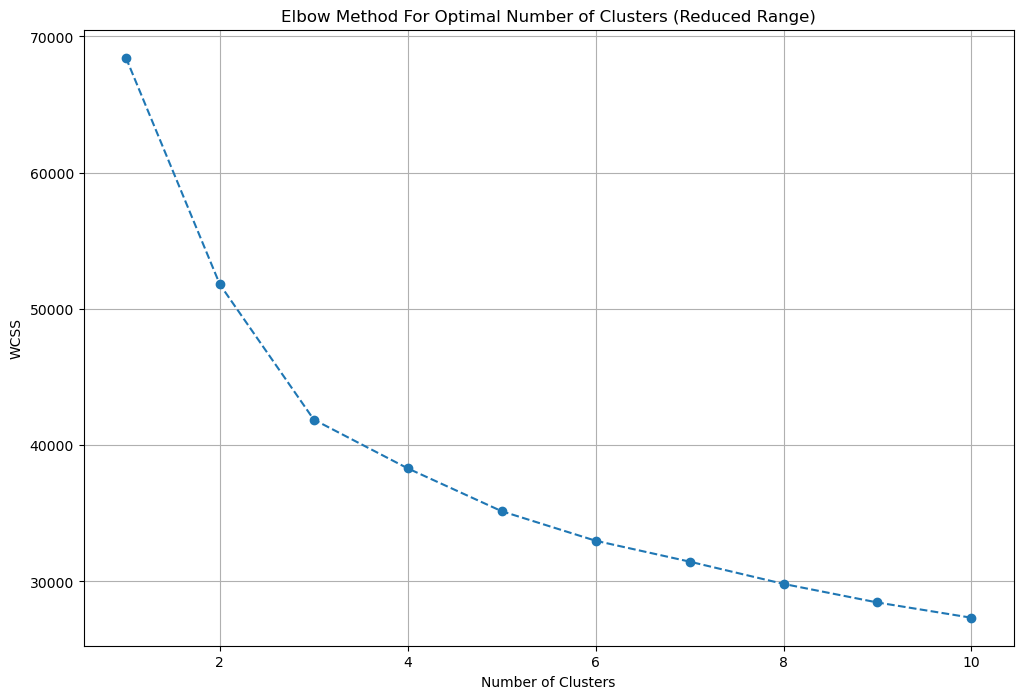

In [41]:
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [42]:
n_clusters = 3

# Fit the KMeans model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(scaled_data)

# Predict the cluster assignments for each row
cluster_assignments = kmeans.predict(scaled_data)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=15.
  warnings.warn(


In [43]:
df = df.iloc[:,:-18]

In [44]:
df['furnishing_type'] = cluster_assignments

In [45]:
df.sample(5)[['furnishDetails','furnishing_type']]
# 0 -> unfurnished
# 1 -> semifurnished
# 2 -> furnished

,furnishDetails,furnishing_type
2459,NaN,2
277,"['1 Water Purifier', '1 Fan', '1 Fridge', '1 Exhaust Fan', '1 Geyser', '1 Stove', '2 Light', '1 AC', '1 Curtains', '1 Modular Kitchen', '1 TV', '1 Chimney', '1 Bed', '1 Wardrobe', 'No Dining Table', 'No Microwave', 'No Sofa', 'No Washing Machine']",1
2048,"['1 Wardrobe', '1 Stove', '1 Modular Kitchen', '1 Chimney', 'No AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No TV', 'No Washing Machine', 'No Water Purifier']",2
1827,"['2 Wardrobe', '1 Exhaust Fan', '16 Light', '1 Modular Kitchen', '1 Chimney', 'No AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Fan', 'No Geyser', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']",1
3451,"['1 Exhaust Fan', '1 Chimney', '1 Modular Kitchen', 'No AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Fan', 'No Geyser', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",2


# 5. feautures

In [46]:
df[['features']].sample(5)

,features
1703,"['Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Visitor Parking', 'Swimming Pool', 'Park', 'Internet/wi-fi connectivity', 'Fitness Centre / GYM', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']"
2828,NaN
3183,"['Water Storage', 'Park', 'Piped-gas', 'Visitor Parking', 'Club house / Community Center']"
2561,"['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']"
160,"['Lift(s)', 'Park']"


In [47]:
df['features'].isnull().sum()

635

In [48]:
import pandas as pd
app_df = pd.read_csv('appartments.csv')
app_df.head(2)

,PropertyName,PropertySubName,NearbyLocations,LocationAdvantages,Link,PriceDetails,TopFacilities
0,Smartworld One DXP,"2, 3, 4 BHK Apartment in Sector 113, Gurgaon","['Bajghera Road', 'Palam Vihar Halt', 'DPSG Palam Vihar', 'Park Hospital', 'Gurgaon Railway Station']","{'Bajghera Road': '800 Meter', 'Palam Vihar Halt': '2.5 KM', 'DPSG Palam Vihar': '3.1 KM', 'Park Hospital': '3.1 KM', 'Gurgaon Railway Station': '4.9 KM', 'The NorthCap University': '5.4 KM', 'Dwarka Expy': '1.2 KM', 'Hyatt Place Gurgaon Udyog Vihar': '7.7 KM', 'Dwarka Sector 21, Metro Station': '7.2 KM', 'Pacific D21 Mall': '7.4 KM', 'Indira Gandhi International Airport': '14.7 KM', 'Hamoni Golf Camp': '6.2 KM', 'Fun N Food Waterpark': '8.8 KM', 'Accenture DDC5': '9 KM'}",https://www.99acres.com/smartworld-one-dxp-sector-113-gurgaon-npxid-r400415,"{'2 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,370 sq.ft.', 'price-range': '₹ 2 - 2.4 Cr'}, '3 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,850 - 2,050 sq.ft.', 'price-range': '₹ 2.25 - 3.59 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '2,600 sq.ft.', 'price-range': '₹ 3.24 - 4.56 Cr'}}","['Swimming Pool', 'Salon', 'Restaurant', 'Spa', 'Cafeteria', 'Sun Deck', '24x7 Security', 'Club House', 'Gated Community']"
1,M3M Crown,"3, 4 BHK Apartment in Sector 111, Gurgaon","['DPSG Palam Vihar Gurugram', 'The NorthCap University', 'Park Hospital, Palam Vihar', 'Pacific D21 Mall', 'Palam Vihar Halt Railway Station']","{'DPSG Palam Vihar Gurugram': '1.4 Km', 'The NorthCap University': '4.4 Km', 'Park Hospital, Palam Vihar': '1.4 Km', 'Pacific D21 Mall': '8.2 Km', 'Palam Vihar Halt Railway Station': '1.2 Km', 'Dwarka Sector 21 Metro Station': '8.1 Km', 'Dwarka Expressway': '450 m', 'Fun N Food Water Park': '8.1 Km', 'Indira Gandhi International Airport': '14.1 Km', 'Tau DeviLal Sports Complex': '11.2 Km', 'Hamoni Golf Camp': '5 Km', 'Hyatt Place': '6.1 Km', 'Altrade Business Centre': '11.2 Km'}",https://www.99acres.com/m3m-crown-sector-111-gurgaon-npxid-r404068,"{'3 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '1,605 - 2,170 sq.ft.', 'price-range': '₹ 2.2 - 3.03 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '2,248 - 2,670 sq.ft.', 'price-range': '₹ 3.08 - 3.73 Cr'}}","['Bowling Alley', 'Mini Theatre', 'Manicured Garden', 'Swimming Pool', 'Flower Garden', 'Reading Lounge', 'Golf Course', 'Barbecue', 'Sauna']"


In [49]:
app_df['PropertyName'] = app_df['PropertyName'].str.lower()

In [50]:
temp_df = df[df['features'].isnull()]

In [51]:
temp_df.shape

(635, 26)

In [52]:
x =temp_df.merge(app_df, left_on= 'society', right_on = 'PropertyName', how= 'left')['TopFacilities']

In [53]:
df.loc[temp_df.index, 'features'] = x.values

In [54]:
df['features'].isnull().sum()

487

In [55]:
from sklearn.preprocessing import MultiLabelBinarizer
import ast

In [56]:
# Convert the string representation of lists in the 'features' column to actual lists
df['features_list'] = df['features'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) and x.startswith('[') else [])

# Use MultiLabelBinarizer to convert the features list into a binary matrix
mlb = MultiLabelBinarizer()
features_binary_matrix = mlb.fit_transform(df['features_list'])

# Convert the binary matrix into a DataFrame
features_binary_df = pd.DataFrame(features_binary_matrix, columns=mlb.classes_)

In [57]:
features_binary_df.sample(5)

,24/7 Power Backup,24/7 Water Supply,24x7 Security,ATM,Aerobics Centre,Air Hockey,Airy Rooms,Amphitheatre,Automated Car Wash,Badminton Court,Bank Attached Property,Banquet Hall,Bar/Chill-Out Lounge,Barbecue,Basketball Court,Beach Volley Ball Court,Billiards,Bowling Alley,Bus Shelter,Business Lounge,CCTV Camera Security,Cafeteria,Car Parking,Car wash area,Card Room,Centrally Air Conditioned,Changing Area,Children's Play Area,Cigar Lounge,Clinic,Club House,Club house / Community Center,Community Hall,Concierge Service,Conference room,Creche/Day care,Cricket Pitch,Doctor on Call,Earthquake Resistant,Entrance Lobby,False Ceiling Lighting,Feng Shui / Vaastu Compliant,Fire Fighting Systems,Fitness Centre / GYM,Flower Garden,Food Court,Foosball,Football,Fountain,Gated Community,Gazebo,Golf Course,Grocery Shop,Gymnasium,High Ceiling Height,High Speed Elevators,Infinity Pool,Intercom Facility,Internal Street Lights,Internet/wi-fi connectivity,Jacuzzi,Jogging Track,Landscape Garden,Laundry,Lawn Tennis Court,Library,Lift(s),Lounge,Low Density Society,Maintenance Staff,Manicured Garden,Medical Centre,Milk Booth,Mini Theatre,Multipurpose Court,Multipurpose Hall,Natural Light,Natural Pond,No open drainage around,Park,Party Lawn,Pergola,Piped Gas,Piped-gas,Pool Table,Power Back up Lift,Power Back-up,Private Garden / Terrace,Property Staff,RO System,Rain Water Harvesting,Reading Lounge,Recently Renovated,Reflexology Park,Restaurant,Salon,Sauna,School,Security / Fire Alarm,Security Personnel,Separate entry for servant room,Sewage Treatment Plant,Shopping Centre,Skating Rink,Solar Lighting,Solar Water Heating,Spa,Spacious Interiors,Squash Court,Steam Room,Sun Deck,Swimming Pool,Temple,Terrace Garden,Theatre,Toddler Pool,Valet Parking,Vastu Compliant,Video Door Security,Visitor Parking,Visitors Parking,Volley Ball Court,Waiting Lounge,Waste Disposal,Water Softener Plant,Water Storage,Water purifier,Water softening plant,Wi-Fi Connectivity,Yoga/Meditation Area
775,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1987,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2551,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
999,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1520,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0


In [58]:
features_binary_df.shape

(3802, 130)

In [59]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(features_binary_df)
    wcss_reduced.append(kmeans.inertia_)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=15.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environm

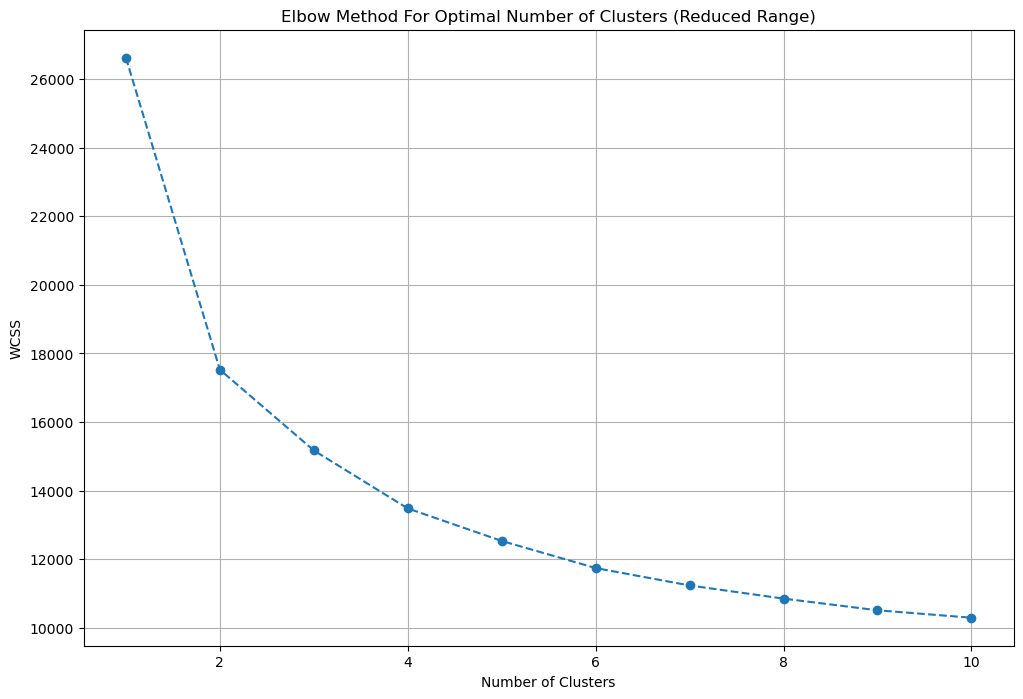

In [60]:
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [61]:
# Define the weights for each feature as provided
# Assigning weights based on perceived luxury contribution
weights = {
    '24/7 Power Backup': 8,
    '24/7 Water Supply': 4,
    '24x7 Security': 7,
    'ATM': 4,
    'Aerobics Centre': 6,
    'Airy Rooms': 8,
    'Amphitheatre': 7,
    'Badminton Court': 7,
    'Banquet Hall': 8,
    'Bar/Chill-Out Lounge': 9,
    'Barbecue': 7,
    'Basketball Court': 7,
    'Billiards': 7,
    'Bowling Alley': 8,
    'Business Lounge': 9,
    'CCTV Camera Security': 8,
    'Cafeteria': 6,
    'Car Parking': 6,
    'Card Room': 6,
    'Centrally Air Conditioned': 9,
    'Changing Area': 6,
    "Children's Play Area": 7,
    'Cigar Lounge': 9,
    'Clinic': 5,
    'Club House': 9,
    'Concierge Service': 9,
    'Conference room': 8,
    'Creche/Day care': 7,
    'Cricket Pitch': 7,
    'Doctor on Call': 6,
    'Earthquake Resistant': 5,
    'Entrance Lobby': 7,
    'False Ceiling Lighting': 6,
    'Feng Shui / Vaastu Compliant': 5,
    'Fire Fighting Systems': 8,
    'Fitness Centre / GYM': 8,
    'Flower Garden': 7,
    'Food Court': 6,
    'Foosball': 5,
    'Football': 7,
    'Fountain': 7,
    'Gated Community': 7,
    'Golf Course': 10,
    'Grocery Shop': 6,
    'Gymnasium': 8,
    'High Ceiling Height': 8,
    'High Speed Elevators': 8,
    'Infinity Pool': 9,
    'Intercom Facility': 7,
    'Internal Street Lights': 6,
    'Internet/wi-fi connectivity': 7,
    'Jacuzzi': 9,
    'Jogging Track': 7,
    'Landscape Garden': 8,
    'Laundry': 6,
    'Lawn Tennis Court': 8,
    'Library': 8,
    'Lounge': 8,
    'Low Density Society': 7,
    'Maintenance Staff': 6,
    'Manicured Garden': 7,
    'Medical Centre': 5,
    'Milk Booth': 4,
    'Mini Theatre': 9,
    'Multipurpose Court': 7,
    'Multipurpose Hall': 7,
    'Natural Light': 8,
    'Natural Pond': 7,
    'Park': 8,
    'Party Lawn': 8,
    'Piped Gas': 7,
    'Pool Table': 7,
    'Power Back up Lift': 8,
    'Private Garden / Terrace': 9,
    'Property Staff': 7,
    'RO System': 7,
    'Rain Water Harvesting': 7,
    'Reading Lounge': 8,
    'Restaurant': 8,
    'Salon': 8,
    'Sauna': 9,
    'Security / Fire Alarm': 9,
    'Security Personnel': 9,
    'Separate entry for servant room': 8,
    'Sewage Treatment Plant': 6,
    'Shopping Centre': 7,
    'Skating Rink': 7,
    'Solar Lighting': 6,
    'Solar Water Heating': 7,
    'Spa': 9,
    'Spacious Interiors': 9,
    'Squash Court': 8,
    'Steam Room': 9,
    'Sun Deck': 8,
    'Swimming Pool': 8,
    'Temple': 5,
    'Theatre': 9,
    'Toddler Pool': 7,
    'Valet Parking': 9,
    'Video Door Security': 9,
    'Visitor Parking': 7,
    'Water Softener Plant': 7,
    'Water Storage': 7,
    'Water purifier': 7,
    'Yoga/Meditation Area': 7
}
# Calculate luxury score for each row
luxury_score = features_binary_df[list(weights.keys())].multiply(list(weights.values())).sum(axis=1)

In [62]:
df['luxury_score'] = luxury_score

In [63]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,features_list,luxury_score
0,house,independent,sector 103,2.25,6367.0,3534.0,Built Up area: 3534 (328.32 sq.m.)Carpet area: 2000 sq.ft. (185.81 sq.m.),3,5,3+,not available,10.0,South,Undefined,NaN,NaN,NaN,NaN,3534.0,2000.00,0,0,0,0,0,2,[],0
1,flat,vatika emilia floors,sector 83,0.65,6190.0,1050.0,Super Built up area 1050(97.55 sq.m.)Built Up area: 950 sq.ft. (88.26 sq.m.)Carpet area: 850 sq.ft. (78.97 sq.m.),2,2,2,not available,1.0,South,Relatively New,"['Retail Shops', 'Town Square', 'INXT City Centre', 'Town Square 2', 'MatriKiran School', 'Apollo Cradle', 'Medeor', 'Medanta', 'Signature Hospital', 'Proposed ISBT', 'Hyatt Regency', 'Karma Lakelands', 'Heritage Village', 'Grand Bharat', 'INOX']","['2 Wardrobe', '4 Fan', '1 Exhaust Fan', '2 Geyser', '8 Light', '1 Modular Kitchen', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']",1050.0,950.0,850.00,0,0,0,0,0,1,"[Centrally Air Conditioned, Water purifier, Security / Fire Alarm, Power Back-up, Feng Shui / Vaastu Compliant, Private Garden / Terrace, Intercom Facility, Lift(s), High Ceiling Height, Maintenance Staff, False Ceiling Lighting, Water Storage, Separate entry for servant room, No open drainage around, Bank Attached Property, Piped-gas, Internet/wi-fi connectivity, Recently Renovated, Visitor Parking, Swimming Pool, Park, Security Personnel, Natural Light, Airy Rooms, Spacious Interiors, Low Density Society, Waste Disposal, Rain Water Harvesting, Water softening plant, Shopping Centre, Fitness Centre / GYM, Club house / Community Center]",174
2,flat,paras dews,sector 106,1.25,10656.0,1173.0,Super Built up area 1900(176.52 sq.m.)Built Up area: 1305 sq.ft. (121.24 sq.m.)Carpet area: 1173 sq.ft. (108.98 sq.m.),3,4,3,"study room,servant room",14.0,East,Relatively New,"['MG Road Metro Station', 'NeoSquare Shopping Mall', 'Dwarka Expressway', 'Glorious World School', 'DPG Institute of Technology', 'Chirag Hospital', 'Indira Gandhi International Airport', 'Gurgaon', 'Country Inn & Suites by Radisson', 'SkyJumper Trampoline Park', 'Hamoni Golf Camp']",NaN,"['Water purifier', 'Centrally Air Conditioned', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']",1900.0,1305.0,1173.00,1,1,0,0,0,2,"[Water purifier, Centrally Air Conditioned, Security / Fire Alarm, Feng Shui / Vaastu Compliant, Private Garden / Terrace, Intercom Facility, Lift(s), Hi

In [64]:
# cols to drop -> nearbyLocations,furnishDetails, features,features_list, additionalRoom
df.drop(columns=['nearbyLocations','furnishDetails','features','features_list','additionalRoom'],inplace=True)

In [65]:
df.sample(5)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
3105,flat,shree balaji appartment,sector 33,0.40,5000.0,800.0,Super Built up area 800(74.32 sq.m.),2,2,2,1.0,NaN,Relatively New,800.0,NaN,NaN,0,0,0,0,0,0,0
2012,flat,dlf new town heights,sector 90,1.25,6476.0,1930.0,Super Built up area 1930(179.3 sq.m.)Built Up area: 1929 sq.ft. (179.21 sq.m.)Carpet area: 1928 sq.ft. (179.12 sq.m.),3,3,3+,6.0,West,Relatively New,1930.0,1929.0,1928.0,0,1,0,1,0,2,136
842,flat,indiabulls centrum park,sector 103,1.01,8080.0,1250.0,Super Built up area 1423(132.2 sq.m.)Carpet area: 1250 sq.ft. (116.13 sq.m.),2,2,3,5.0,West,Relatively New,1423.0,NaN,1250.0,0,0,1,0,0,1,165
409,house,independent,sector 12,2.50,13888.0,1800.0,Plot area 1800(167.23 sq.m.),9,5,2,1.0,South-East,Old Property,NaN,1800.0,NaN,0,0,0,1,0,2,8
1793,flat,supertech araville,sector 79,1.45,7455.0,1945.0,Carpet area: 1945 (180.7 sq.m.),3,3,3,3.0,North,Relatively New,NaN,NaN,1945.0,0,0,0,0,0,2,0


In [66]:
df.shape

(3802, 23)

In [67]:
df.to_csv('gurgaon_properties_cleaned_v2.csv',index=False)